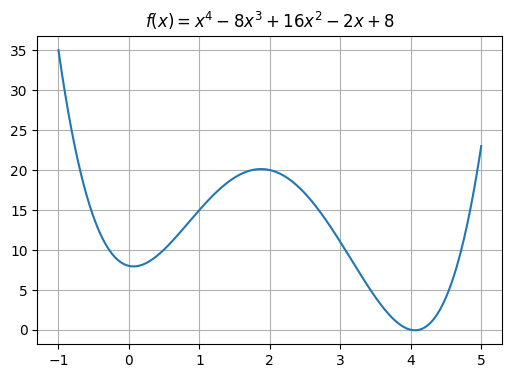

In [5]:
# draw a function f(x) = x^4-8x^3+16x^2-2x+8

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 5, 1000)
# y = x**4-8*x**3+16*x**2-2*x+8
# f = lambda x : x**4-8*x**3+16*x**2-2*x+8
def f(x):
    return x ** 4 - 8 * x ** 3 + 16 * x ** 2 - 2 * x + 8

y = f(x)

fig = plt.figure(figsize=[6, 4])
plt.plot(x, y)
plt.grid(True)
plt.title("$f(x)=x^4-8x^3+16x^2-2x+8$")
plt.show()

mu =  0.010501050105010457 L =  -156.34663357007958


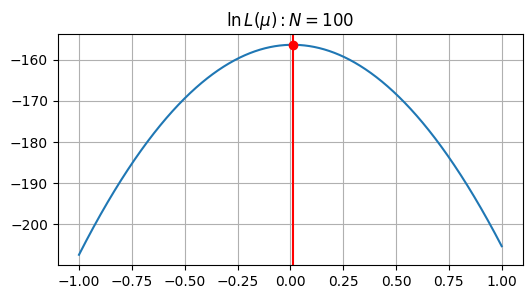

mle_mu =  0.010427696482272576


In [27]:
# use scipy to generate N samples from a normal distribution with mean 0 and variance 1
# import scipy.stats as stats
from scipy.stats import norm 

N = 100
mu = 0
sigma = 1
x = norm.rvs(loc = mu, scale = sigma, size = N)

# compute the joint likelihood of N samples for different values of mu and sigma=1
mu = np.linspace(-1, 1, 10000)
sigma = 1
L = np.zeros(len(mu))
for i in range(len(mu)):
    L[i] = np.sum(np.log(norm.pdf(x, loc = mu[i], scale = sigma)))
    # L[i] = np.prod(norm.pdf(x, mu[i], sigma))

max_L_index = np.argmax(L)
print("mu = ", mu[max_L_index], "L = ", L[max_L_index])

fig = plt.figure(figsize=[6, 3])
plt.plot(mu, L)
plt.plot(mu[max_L_index], L[max_L_index], 'ro')
# draw a vertical line at the maximum joint likelihood
plt.axvline(x = mu[max_L_index], color = 'r')
plt.grid(True)
plt.title("$\ln L(\mu): N={}$".format(N))
plt.show()

mle_mu = x.mean()
print("mle_mu = ", mle_mu)


In [28]:
# 寫一支副程式計算對數概似函數值
def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))


mu =  -0.002300230023002281 L =  -149.1879199607117


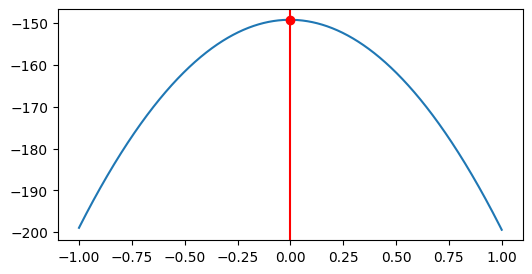

In [29]:
from scipy.stats import norm 

N = 100
mu = 0
sigma = 1
x = norm.rvs(loc = mu, scale = sigma, size = N)
mu = np.linspace(-1, 1, 10000)
L = np.zeros(len(mu))
for i in range(len(mu)):
    L[i] = log_likelihood(x, mu[i], sigma)

max_L_index = np.argmax(L)
print("mu = ", mu[max_L_index], "L = ", L[max_L_index])

fig = plt.figure(figsize=[6, 3])
plt.plot(mu, L)
plt.plot(mu[max_L_index], L[max_L_index], 'ro')
# draw a vertical line at the maximum joint likelihood
plt.axvline(x = mu[max_L_index], color = 'r')

In [71]:
#利用演算法計算最大概似估計值

from scipy.optimize import minimize
from scipy.stats import norm 

N = 100
mu = 0
sigma = 1
x = norm.rvs(loc = mu, scale = sigma, size = N)

def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

def minus_log_likelihood(mu):
    return -log_likelihood(x, mu, sigma)

result = minimize(minus_log_likelihood, 0)
print(result)
mle_mu = result.x
print("mle_mu = ", mle_mu)
print(result.fun)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 135.32135559960508
        x: [-4.761e-02]
      nit: 1
      jac: [ 1.907e-06]
 hess_inv: [[1]]
     nfev: 6
     njev: 3
mle_mu =  [-0.04760683]
135.32135559960508


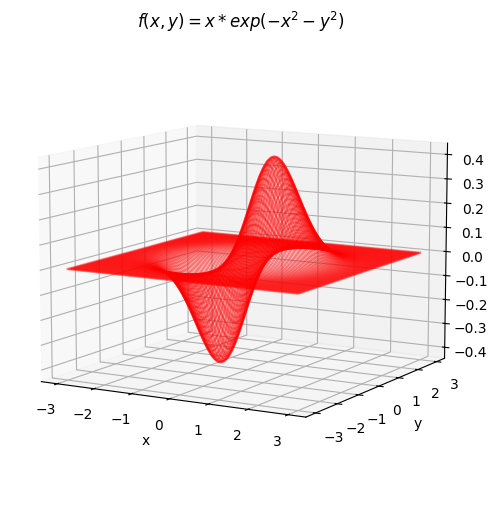

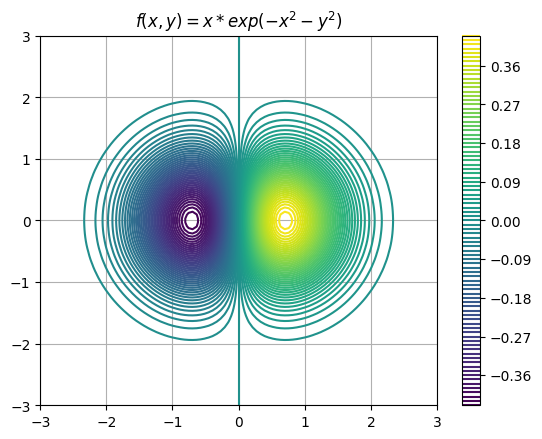

In [69]:
# Draw a mesh grid for f(x, y) = x*exp(-x^2 - y^2)

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y) # create a mesh grid
Z = X * np.exp(-X**2 - Y**2) # f(x, y) = x*exp(-x^2 - y^2)

fig = plt.figure(figsize=[9, 6])
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, Z, color = 'r', \
                  alpha=0.3, rstride = 1, cstride = 1)
ax.view_init(10, -60)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")

plt.title("$f(x,y) = x*exp(-x^2 - y^2)$")
plt.show()

# Draw a contour plot for f(x, y) = x*exp(-x^2 - y^2)
# contour lines with 100 levels

plt.contour(X, Y, Z, 100)
# plt.contour(X, Y, Z)
plt.grid(True)
# add colorbar
plt.colorbar()
plt.title("$f(x,y) = x*exp(-x^2 - y^2)$")
plt.show()

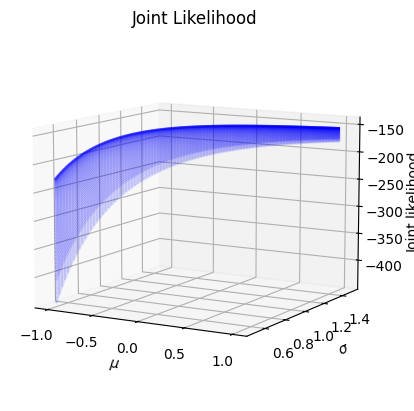

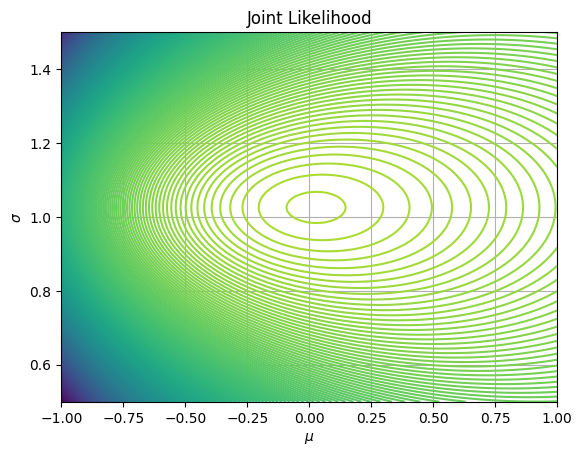

In [12]:

# generate N samples from a normal distribution with mean 0 and variance 1
# import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

N = 100
x = norm.rvs(loc = 0, scale = 1, size = N)

def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

# def minus_log_likelihood(mu, sigma):
#     return -log_likelihood(x, mu, sigma)
def minus_log_likelihood(v):
    return -log_likelihood(x, v[0], v[1])

# minus_log_likelihood = lambda v: -log_likelihood(x, v[0], v[1])

result = minimize(minus_log_likelihood, x0=[0, 1] )
# draw the 3D plot of the joint likelihood by wireframe

fig = plt.figure()
ax = plt.axes(projection = '3d')
mu = np.linspace(-1, 1, 100)
sigma = np.linspace(0.5, 1.5, 100)
L = np.zeros((len(mu), len(sigma)))

for i in range(len(mu)):
    for j in range(len(sigma)):
        L[i, j] = log_likelihood(x, mu[i], sigma[j])

ax.plot_wireframe(mu, sigma, L, color ='blue',
    alpha=0.1, rstride = 1, cstride = 1, )

# surf = ax.plot_surface(mu, sigma, L, rstride = 1, cstride = 1, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('Joint likelihood')
ax.set_title('Joint Likelihood')
ax.view_init(10, -60)  #(elev=-165, azim=60)
plt.show()

# draw the contour plot of the joint likelihood
levels = np.linspace(-450, -100, 300)
fig, ax = plt.subplots(1, 1)
contour = ax.contour(mu, sigma, L, levels = levels)
ax.set_title('Joint Likelihood')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.grid(True)